Welcome DataHacker!
 
Congratulations on your new job! This time you are helping out Unicorn Investors with your data hacking skills. They are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.
 
You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

Evaluation Metric:
Root Mean Squre Error (RMSE) is the evaluation metric for this contest

In [709]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [710]:
# load datasets
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Jet-Rail-TS/main/Train_SU63ISt%20-%20Train_SU63ISt.csv')
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Jet-Rail-TS/main/Test_0qrQsBZ%20-%20Test_0qrQsBZ.csv')
sample = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Jet-Rail-TS/main/sample_submission_LSeus50%20-%20sample_submission_LSeus50.csv')

In [711]:
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [712]:
test

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00
...,...,...
5107,23395,26-04-2015 19:00
5108,23396,26-04-2015 20:00
5109,23397,26-04-2015 21:00
5110,23398,26-04-2015 22:00


In [713]:
sample

,ID,Count
0,18288,0
1,18289,0
2,18290,0
3,18291,0
4,18292,0
...,...,...
5107,23395,0
5108,23396,0
5109,23397,0
5110,23398,0


In [714]:
train.info

<bound method DataFrame.info of           ID          Datetime  Count
0          0  25-08-2012 00:00      8
1          1  25-08-2012 01:00      2
2          2  25-08-2012 02:00      6
3          3  25-08-2012 03:00      2
4          4  25-08-2012 04:00      2
...      ...               ...    ...
18283  18283  25-09-2014 19:00    868
18284  18284  25-09-2014 20:00    732
18285  18285  25-09-2014 21:00    702
18286  18286  25-09-2014 22:00    580
18287  18287  25-09-2014 23:00    534

[18288 rows x 3 columns]>

In [715]:
test.info

<bound method DataFrame.info of          ID          Datetime
0     18288  26-09-2014 00:00
1     18289  26-09-2014 01:00
2     18290  26-09-2014 02:00
3     18291  26-09-2014 03:00
4     18292  26-09-2014 04:00
...     ...               ...
5107  23395  26-04-2015 19:00
5108  23396  26-04-2015 20:00
5109  23397  26-04-2015 21:00
5110  23398  26-04-2015 22:00
5111  23399  26-04-2015 23:00

[5112 rows x 2 columns]>

Graph

Text(0, 0.5, 'Count')

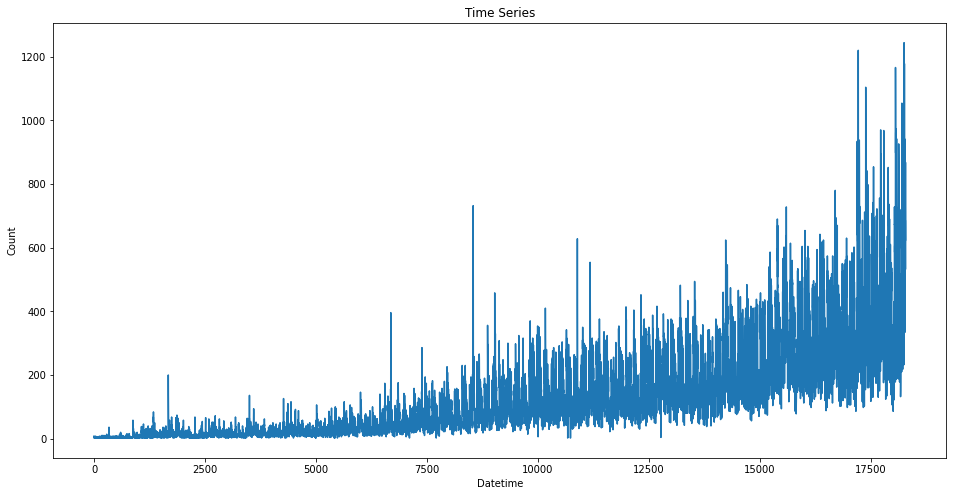

In [716]:
train['Count'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("Datetime") 
plt.ylabel("Count")

Timestamp train

In [717]:
# to explicitly convert the date column to type DATETIME

Train = train.drop('ID', axis=1)
Train['Datetime'] = pd.to_datetime(Train['Datetime'])
Train = Train.set_index('Datetime')
Train

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


Timestamp test

In [718]:

# to explicitly convert the date column to type DATETIME

Test = test.drop('ID', axis=1)
Test['Datetime'] = pd.to_datetime(Test['Datetime'])
Test = Test.set_index('Datetime')
Test

""
Datetime
2014-09-26 00:00:00
2014-09-26 01:00:00
2014-09-26 02:00:00
2014-09-26 03:00:00
2014-09-26 04:00:00
...
2015-04-26 19:00:00
2015-04-26 20:00:00
2015-04-26 21:00:00


Lag plot


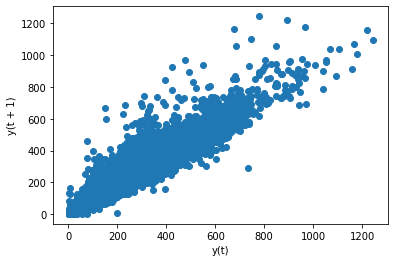

In [719]:
from pandas.plotting import lag_plot

lag_plot(Train)
plt.show()

Correlation matrix

In [720]:

from pandas import DataFrame
from pandas import concat

values = DataFrame(Train.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.964244
t+1  0.964244  1.000000


Autocorrelation plot

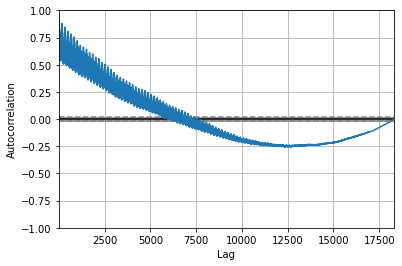

In [721]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(Train)
plt.show()

Plot acf

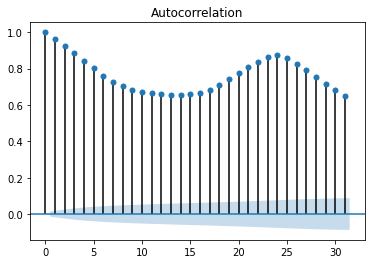

In [722]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(Train, lags=31) #only 31 for readibility
plt.show()

Combine train and test

In [723]:
rows = len(train)

y = Train.Count

X_tot = Train.append(Test)
X_tot['Count'].interpolate(method='time', inplace=True)
X_tot

,Count
Datetime,
2012-08-25 00:00:00,8.0
2012-08-25 01:00:00,2.0
2012-08-25 02:00:00,6.0
2012-08-25 03:00:00,2.0
2012-08-25 04:00:00,2.0
...,...
2015-04-26 19:00:00,368.0
2015-04-26 20:00:00,368.0
2015-04-26 21:00:00,368.0


Walk forward validation

Test RMSE: 12.448


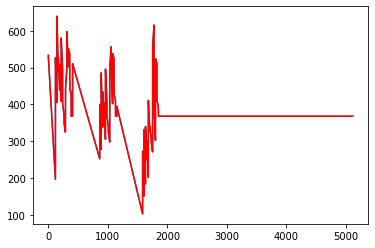

In [724]:
from sklearn.metrics import mean_squared_error

# create lagged dataset
values = DataFrame(X_tot.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:rows], X[rows:]
X_train, y_train = train[:,0], train[:,1]
X_test, y_test = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in X_test:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(y_test, predictions, squared=False)
print('Test RMSE: %.3f' % test_score)
# plot predictions vs expected
plt.plot(y_test)
plt.plot(predictions, color='red')
plt.show()


In [725]:
predictions

[534.0,
 531.1900826446281,
 528.3801652892562,
 525.5702479338843,
 522.7603305785124,
 519.9504132231405,
 517.1404958677685,
 514.3305785123966,
 511.5206611570248,
 508.7107438016529,
 505.900826446281,
 503.09090909090907,
 500.2809917355372,
 497.4710743801653,
 494.6611570247934,
 491.8512396694215,
 489.0413223140496,
 486.2314049586777,
 483.42148760330576,
 480.61157024793386,
 477.801652892562,
 474.9917355371901,
 472.1818181818182,
 469.3719008264463,
 466.56198347107437,
 463.75206611570246,
 460.9421487603306,
 458.1322314049587,
 455.3223140495868,
 452.5123966942149,
 449.702479338843,
 446.89256198347107,
 444.08264462809916,
 441.27272727272725,
 438.46280991735534,
 435.65289256198344,
 432.8429752066116,
 430.0330578512397,
 427.22314049586777,
 424.41322314049586,
 421.60330578512395,
 418.79338842975204,
 415.9834710743802,
 413.1735537190083,
 410.3636363636364,
 407.55371900826447,
 404.74380165289256,
 401.93388429752065,
 399.12396694214874,
 396.314049586776

Feature engineering

In [726]:
# creating new dataframe from new_cases column
count = X_tot[['Count']]
# inserting new column with yesterday's new_cases values
count.loc[:,'yesterday'] = count.loc[:,'Count'].shift()
# inserting another column with difference between yesterday and day before yesterday's new_cases values.
count.loc[:,'yesterday_diff'] = count.loc[:,'yesterday'].diff()
count

,Count,yesterday,yesterday_diff
Datetime,,,
2012-08-25 00:00:00,8.0,NaN,NaN
2012-08-25 01:00:00,2.0,8.0,NaN
2012-08-25 02:00:00,6.0,2.0,-6.0
2012-08-25 03:00:00,2.0,6.0,4.0
2012-08-25 04:00:00,2.0,2.0,-4.0
...,...,...,...
2015-04-26 19:00:00,368.0,368.0,0.0
2015-04-26 20:00:00,368.0,368.0,0.0
2015-04-26 21:00:00,368.0,368.0,0.0


Impute

In [727]:
count.fillna(0, inplace=True)

In [728]:
count.isnull().sum()

Count             0
yesterday         0
yesterday_diff    0
dtype: int64

Define training and testing sets

In [729]:

X_train = count[: rows].drop(['Count'], axis = 1)
y_train = y
X_test = count[rows :].drop(['Count'], axis = 1)

X_train.shape, y_train.shape, X_test.shape

((18288, 2), (18288,), (5112, 2))

Define model

In [730]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9299324247022055


Predict on test set

In [731]:
prediction = model.predict(X_test)
prediction = y_pred.astype(int)
prediction

array([517, 516, 513, ..., 359, 359, 359])

Prepare submission

In [732]:
final_result = pd.DataFrame({'ID': test_ID, 'Count': prediction})
final_result

,ID,Count
0,18288,517
1,18289,516
2,18290,513
3,18291,511
4,18292,508
...,...,...
5107,23395,359
5108,23396,359
5109,23397,359
5110,23398,359


In [733]:
final_result.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [734]:
#upload submission
submission = pd.read_csv("submission.csv")
submission

,ID,Count
0,18288,517
1,18289,516
2,18290,513
3,18291,511
4,18292,508
...,...,...
5107,23395,359
5108,23396,359
5109,23397,359
5110,23398,359
